# __How Do People Feel About New Video Games Versus Old Video Games?__

## __Alexander Buckler 12/10/2024__

_In today's age, video games are an extremely common hobby around the world. It can provide a sense of fun, distraction, and community for the people who play them. However, I have noticed that a lot of people will say negative things about modern gaming. They say that "new games are bad" and "the games don't have spirit in them", and "gaming used to be good". This got me wondering, are new games actually as unfavorable as older games? I want to find out whether or not modern video games are actually as unfavorable as people seem to say, or if people are looking at older games with rose tinted glasses._

_To do this, I will be comparing the reviews of games from the video game review site GameSpot to get a general consensus on how people feel about old versus new video games._

I will start off by importing the tools that I need to complete this analysis.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import urllib
import requests
import numpy as np

# __Retrieving the API's__

In [3]:
api_key = pd.read_csv(r"C:\Users\Alex Buckler\data_SKOOBY\GamesKey.txt")
key_s = api_key['GamesKey'].iloc[0]

I got stuck when it came to actually finding a usable api for actual video game scores, which is what this analysis is going to be based on. I initially was going to use Steam to compare the like to dislaike ratios for games but I could not get into the api. Then I tried to find an api for the game and movie review site metacritic, but there was not an available api for metacritic. Luckily, GameSpot had an official api that I could use.

The two cells below are me trying to pull the endpoints from the api. I do this by essentially constructing the url with the boundaries of data that I want to pull. In the filters, I chose to pull from two seperate timeframes for video game review data. One is for older video games from the yars 2000 to 2010. The second timeframe is from the years 2010 to the present. This way, I can roughly see how game review scores were from these time frames.

In [4]:
header = {'User-agent': 'Mozilla/5.0'}
reviews_e = 'http://www.gamespot.com/api/reviews/'
url_key = '?api_key=' + key_s
url_format = '&format=json'

In [5]:
url_sort_asc = '&sort=score:asc'
url_sort_desc = '&sort=score:desc'
url_filter_past ='&filter=publish_date:2000-01-01|2010-01-01'
url_filter_present ='&filter=publish_date:2010-01-02|2024-12-03'

The below 4 cells are me taking data for the top and bottom 100 scores from both the past and present games. The thing about the GameSpot API is that it limits the amount of results it can generate to only 100. I initially wanted to pull a set of random game scores from a set of games, but I decided to reorient myself to choosing the top and bottom 100 scores of past and present games to compare how they fare against each other.

In [ ]:
response1 = requests.get(reviews_e + url_key + url_format + url_sort_asc + url_filter_past, headers = header)
response1.text

In [ ]:
response2 = requests.get(reviews_e + url_key + url_format + url_sort_desc + url_filter_past, headers = header)
response2.text

In [ ]:
response3 = requests.get(reviews_e + url_key + url_format + url_sort_asc + url_filter_present, headers = header)
response3.text

In [ ]:
response4 = requests.get(reviews_e + url_key + url_format + url_sort_desc + url_filter_present, headers = header)
response4.text

Now that I know that I am getting responses for each of my endpoints, I can start digging into the endpoints to start finding the data that I need. I can start by looking at the categories that I can look through.

In [10]:
response_dict1 = json.loads(response1.text)
response_dict1.keys()
#pd.DataFrame(response_dict['error'])

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [11]:
response_dict2 = json.loads(response2.text)
response_dict2.keys()

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [12]:
response_dict3 = json.loads(response3.text)
response_dict3.keys()

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [13]:
response_dict4 = json.loads(response4.text)
response_dict4.keys()

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [ ]:
df1 = pd.DataFrame(response_dict1['results'])
df1.head()

In [ ]:
df2 = pd.DataFrame(response_dict2['results'])
df2.head()

In [ ]:
df3 = pd.DataFrame(response_dict3['results'])
df3.head()

In [ ]:
df4 = pd.DataFrame(response_dict4['results'])
df4.head()

In [18]:
data_past = pd.concat([df1, df2])
data_past

,publish_date,update_date,review_type,id,authors,title,image,score,deck,good,bad,body,lede,game,releases,site_detail_url,videos_api_url
0,2005-08-25 03:52:00,2006-08-29 01:19:19,primary,6152120,Greg Mueller,Super Collapse! II Review,{'square_tiny': 'https://www.gamespot.com/a/up...,0.0,"With four different game modes, Super Collapse...","Fun, addictive gameplay|Four puzzle modes to c...",Only 10 puzzles in puzzle mode|Music gets repe...,"<p> Super Collapse! II is a fast-paced, addic...","With four different game modes, Super Collapse...","{'id': 21196, 'name': 'Super Collapse II', 'ap...","[{'upc': None, 'distribution_type': 'Online', ...",https://www.gamespot.com/reviews/super-collaps...,NaN
1,2004-01-14 05:45:11,2004-01-14 05:45:11,primary,6086528,Alex Navarro,Big Rigs: Over the Road Racing Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,Just how bad is Big Rigs: Over the Road Racing...,,,"<p> Bad games are released all the time, and ...",Just how bad is Big Rigs: Over the Road Racing...,"{'id': 20030, 'name': 'Big Rigs: Over the Road...","[{'upc': '834656000905', 'distribution_type': ...",https://www.gamespot.com/reviews/big-rigs-over...,https://www.gamespot.com/api/videos/?filter=id...
2,2003-03-18 02:31:17,2003-03-18 02:31:17,primary,6023405,Andrew Park,Gods and Generals Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.2,It's difficult to imagine that Gods and Genera...,,,<p> You've probably heard from someone before ...,It's difficult to imagine that Gods and Genera...,"{'id': 18138, 'name': 'Gods and Generals', 'ap...","[{'upc': '047875312791', 'distribution_type': ...",https://www.gamespot.com/reviews/gods-and-gene...,https://www.gamespot.com/api/videos/?filter=id...
3,2003-03-25 04:12:15,2003-03-25 04:12:15,primary,6023928,Ryan Davis,Dragon Ball Z Ultimate Battle 22 Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.2,"If you're unfamiliar with Dragon Ball Z, you'r...",,,<p> Since there's probably some confusion abou...,"If you're unfamiliar with Dragon Ball Z, you'r...","{'id': 10162, 'name': 'Dragon Ball Z: Ultimate...","[{'upc': '742725246638', 'distribution_type': ...",https://www.gamespot.com/reviews/dragon-ball-z...,https://www.gamespot.com/api/videos/?filter=id...
4,2001-05-01 06:04:11,2006-05-17 03:09:03,primary,2714466,Jeff Gerstmann,KISS Pinball Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.3,KISS fans will be disappointed by the distinct...,,,<p>KISS Pinball is the latest in Take-Two Inte...,KISS fans will be disappointed by the distinct...,"{'id': 3492, 'name': 'KISS Pinball', 'api_deta...","[{'upc': '710425230776', 'distribution_type': ...",https://www.gamespot.com/reviews/kiss-pinball-...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2006-03-25 04:26:47,2006-03-25 04:26:47,primary,6146661,Greg Kasavin,The Elder Scrolls IV: Oblivion Review,{'square_tiny': 'https://www.gamespot.com/a/up...,9.3,The Elder Scrolls IV: Oblivion is simply one o...,"Huge, lavishly detailed world offers tremendou...",Frequent though fairly brief loading times|You...,<p> This is a rare and remarkable achievement...,The Elder Scrolls IV: Oblivion is simply one o...,"{'id': 22229, 'name': 'The Elder Scrolls IV: O...","[{'upc': '5026555039765', 'distribution_type':...",https://www.gamespot.com/reviews/the-elder-scr...,https://www.gamespot.com/api/videos/?filter=id...
96,2001-11-19 06:15:03,2001-11-19 06:15:03,primary,2825778,Gord Goble,FIFA 2002 Review,{'square_tiny': 'https://www.gamespot.com/a/up...,9.3,Fans of real-life soccer will find this the mo...,,,<p>Those who hammer the buttons on their gamep...,Fans of real-life soccer will find this the mo...,"{'id': 3798, 'name': 'FIFA 2002', 'api_detail_...","[{'upc': '014633143287', 'distribution_type': ...",https://www.gamespot.com/reviews/fifa-2002-rev...,NaN
97,2005-02-04 06:00:12,2006-05-17 03:08:41,secondary,6118013,Justin Calvert,World Soccer Winning Eleven 8 International Re...,{'square_tiny': 'https://

In [63]:
data_past_final = data_past.drop(columns = ['review_type', 'deck', 'body', 'lede', 'image', 'videos_api_url', 'site_detail_url'])
t_response = t_response.dropna()
t_response_df = pd.DataFrame(t_response['game'].to_list())
t_response['game_id'] = t_response_df['id']
t_response['game_name'] = t_response_df['name']
data_past_final

,publish_date,update_date,id,authors,title,score,good,bad,game,releases
0,2005-08-25 03:52:00,2006-08-29 01:19:19,6152120,Greg Mueller,Super Collapse! II Review,0.0,"Fun, addictive gameplay|Four puzzle modes to c...",Only 10 puzzles in puzzle mode|Music gets repe...,"{'id': 21196, 'name': 'Super Collapse II', 'ap...","[{'upc': None, 'distribution_type': 'Online', ..."
1,2004-01-14 05:45:11,2004-01-14 05:45:11,6086528,Alex Navarro,Big Rigs: Over the Road Racing Review,1.0,,,"{'id': 20030, 'name': 'Big Rigs: Over the Road...","[{'upc': '834656000905', 'distribution_type': ..."
2,2003-03-18 02:31:17,2003-03-18 02:31:17,6023405,Andrew Park,Gods and Generals Review,1.2,,,"{'id': 18138, 'name': 'Gods and Generals', 'ap...","[{'upc': '047875312791', 'distribution_type': ..."
3,2003-03-25 04:12:15,2003-03-25 04:12:15,6023928,Ryan Davis,Dragon Ball Z Ultimate Battle 22 Review,1.2,,,"{'id': 10162, 'name': 'Dragon Ball Z: Ultimate...","[{'upc': '742725246638', 'distribution_type': ..."
4,2001-05-01 06:04:11,2006-05-17 03:09:03,2714466,Jeff Gerstmann,KISS Pinball Review,1.3,,,"{'id': 3492, 'name': 'KISS Pinball', 'api_deta...","[{'upc': '710425230776', 'distribution_type': ..."
...,...,...,...,...,...,...,...,...,...,...
95,2006-03-25 04:26:47,2006-03-25 04:26:47,6146661,Greg Kasavin,The Elder Scrolls IV: Oblivion Review,9.3,"Huge, lavishly detailed world offers tremendou...",Frequent though fairly brief loading times|You...,"{'id': 22229, 'name': 'The Elder Scrolls IV: O...","[{'upc': '5026555039765', 'distribution_type':..."
96,2001-11-19 06:15:03,2001-11-19 06:15:03,2825778,Gord Goble,FIFA 2002 Review,9.3,,,"{'id': 3798, 'name': 'FIFA 2002', 'api_detail_...","[{'upc': '014633143287', 'distribution_type': ..."
97,2005-02-04 06:00:12,2006-05-17 03:08:41,6118013,Justin Calvert,World Soccer Winning Eleven 8 International Re...,9.3,Excellent career mode|Believable ball physics ...,Lots of unlicensed teams|No Bolton Wanderers,"{'id': 20995, 'name': 'World Soccer Winning El...","[{'upc': None, 'distribution_type': 'Retail', ..."
98,2005-10-24 05:54:00,2005-10-24 05:54:00,6136415,Greg Kasavin,Resident Evil 4 Review,9.3,Incredibly amazing audiovisual presentation|Ex...,Some uncharacteristically goofy dialogue|A cou...,"{'id': 3941, 'name': 'Resident Evil 4 (2005)',...","[{'upc': '4976219038546', 'distribution_type':..."


In [39]:
data_pres = pd.concat([df3, df4])
data_pres

,publish_date,update_date,review_type,id,authors,title,image,score,deck,good,bad,body,lede,game,releases,site_detail_url,videos_api_url,movie,television
0,2022-04-18 07:00:00,2022-04-18 09:53:53,primary,6417864,Richard Wakeling,Postal 4: No Regerts Review - Nothing But Regrets,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,Postal 4: No Regerts is an abysmal video game ...,The voice acting is surprisingly decent|At som...,Enemy AI is dumb and fundamentally broken|Comb...,"<p dir=""ltr"">The Steam page for open-world fir...",Postal 4: No Regerts is an abysmal video game ...,"{'id': 503272, 'name': 'POSTAL 4: No Regerts',...","[{'upc': None, 'distribution_type': 'Steam', '...",https://www.gamespot.com/reviews/postal-4-no-r...,NaN,NaN,NaN
1,2013-07-11 05:18:45,2013-07-11 06:34:07,primary,6411189,Gamespot Staff,Ride to Hell: Retribution Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,"Ride to Hell: Retribution is a hideous, slappe...",,Some of the worst voice acting imaginable|Awfu...,"<p> Much like with terrible movies and songs,...","Ride to Hell: Retribution is a hideous, slappe...","{'id': 38059, 'name': 'Ride to Hell: Retributi...","[{'upc': '4020628511586', 'distribution_type':...",https://www.gamespot.com/reviews/ride-to-hell-...,https://www.gamespot.com/api/videos/?filter=id...,NaN,NaN
2,2015-02-09 05:32:00,2015-02-09 05:33:03,primary,6416027,Don Saas,Raven's Cry Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,A game where its most tolerable moments are te...,,"Constant crashes, including a bug which kills ...","<p>Gather 'round, ye sons and daughters of lan...",But I don't want to be a pirate!,"{'id': 107439, 'name': 'Raven's Cry', 'api_det...","[{'upc': None, 'distribution_type': 'Steam', '...",https://www.gamespot.com/reviews/raven-s-cry-r...,NaN,NaN,NaN
3,2014-05-28 11:57:00,2014-05-28 11:58:19,primary,6415776,Kevin VanOrd,Air Control Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,"Air Control is 30 minutes worth of horrific, b...",,"Busted interface, busted mouselook, busted mou...",<p>Three ugly character models sit around a fi...,Systems failure.,"{'id': 244798, 'name': 'Air Control', 'api_det...","[{'upc': None, 'distribution_type': 'Desura', ...",https://www.gamespot.com/reviews/air-control-r...,NaN,NaN,NaN
4,2013-06-28 06:34:00,2013-10-09 01:05:41,primary,6410885,Shaun McInnis,Motorbike Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.5,Motorbike is a cruel joke of a game that no Pl...,,Wildly unpredictable physics|Abysmal track des...,"<p>To call Motorbike a <a href=""https://www.ga...",Motorbike is a cruel joke of a game that no Pl...,"{'id': 129862, 'name': 'Motorbike', 'api_detai...","[{'upc': None, 'distribution_type': 'PlayStati...",https://www.gamespot.com/reviews/motorbike-rev...,https://www.gamespot.com/api/videos/?filter=id...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-06-03 03:28:39,2011-06-03 03:28:39,secondary,6316956,Justin Calvert,Dirt 3 Review,{'square_tiny': 'https://www.gamespot.com/a/up...,9.0,Dirt 3 is a superb off-road racer that adds so...,New event types add even more variety to both ...,YouTube functionality is limited,"<p> When <a href=""https://www.gamespot.com/"" ...",Dirt 3 is a superb off-road racer that adds so...,"{'id': 81568, 'name': 'DiRT 3', 'api_detail_ur...","[{'upc': None, 'distribution_type': 'PlayStati...",https://www.gamespot.com/reviews/dirt-3-review...,https://www.gamespot.com/api/videos/?filter=id...,NaN,NaN
96,2011-05-31 03:34:22,2011-05-31 03:34:22,secondary,6316260,Justin Calvert,DiRT 3 Review,{'square_tiny': 'https://www.gamespot.com/a/up...,9.0,Dirt 3 is a superb off-road racer that adds so...,New event types add even more variety to both ...,YouTube functionality is limited,"<p> When <a href=""https://www.gamespot.com/"" ...",Dirt 3 is a superb off-road racer that adds so...,"{'id': 81568, 'name': 'DiRT 3', 'api_detail_ur...","[{'upc': None, 'distribution_t

In [64]:
data_pres_final = data_pres.drop(columns = ['review_type', 'deck', 'body', 'lede', 'image', 'movie', 'television', 'videos_api_url', 'site_detail_url'])
t_response1 = t_response1.dropna()
t_response_df1 = pd.DataFrame(t_response['game'].to_list())
t_response1['game_id'] = t_response_df1['id']
t_response1['game_name'] = t_response_df1['name']
data_pres_final

,publish_date,update_date,id,authors,title,score,good,bad,game,releases
0,2022-04-18 07:00:00,2022-04-18 09:53:53,6417864,Richard Wakeling,Postal 4: No Regerts Review - Nothing But Regrets,1.0,The voice acting is surprisingly decent|At som...,Enemy AI is dumb and fundamentally broken|Comb...,"{'id': 503272, 'name': 'POSTAL 4: No Regerts',...","[{'upc': None, 'distribution_type': 'Steam', '..."
1,2013-07-11 05:18:45,2013-07-11 06:34:07,6411189,Gamespot Staff,Ride to Hell: Retribution Review,1.0,,Some of the worst voice acting imaginable|Awfu...,"{'id': 38059, 'name': 'Ride to Hell: Retributi...","[{'upc': '4020628511586', 'distribution_type':..."
2,2015-02-09 05:32:00,2015-02-09 05:33:03,6416027,Don Saas,Raven's Cry Review,1.0,,"Constant crashes, including a bug which kills ...","{'id': 107439, 'name': 'Raven's Cry', 'api_det...","[{'upc': None, 'distribution_type': 'Steam', '..."
3,2014-05-28 11:57:00,2014-05-28 11:58:19,6415776,Kevin VanOrd,Air Control Review,1.0,,"Busted interface, busted mouselook, busted mou...","{'id': 244798, 'name': 'Air Control', 'api_det...","[{'upc': None, 'distribution_type': 'Desura', ..."
4,2013-06-28 06:34:00,2013-10-09 01:05:41,6410885,Shaun McInnis,Motorbike Review,1.5,,Wildly unpredictable physics|Abysmal track des...,"{'id': 129862, 'name': 'Motorbike', 'api_detai...","[{'upc': None, 'distribution_type': 'PlayStati..."
...,...,...,...,...,...,...,...,...,...,...
95,2011-06-03 03:28:39,2011-06-03 03:28:39,6316956,Justin Calvert,Dirt 3 Review,9.0,New event types add even more variety to both ...,YouTube functionality is limited,"{'id': 81568, 'name': 'DiRT 3', 'api_detail_ur...","[{'upc': None, 'distribution_type': 'PlayStati..."
96,2011-05-31 03:34:22,2011-05-31 03:34:22,6316260,Justin Calvert,DiRT 3 Review,9.0,New event types add even more variety to both ...,YouTube functionality is limited,"{'id': 81568, 'name': 'DiRT 3', 'api_detail_ur...","[{'upc': None, 'distribution_type': 'Retail', ..."
97,2011-05-23 05:48:30,2011-05-23 05:48:30,6315203,Justin Calvert,DiRT 3 Review,9.0,New event types add even more variety to both ...,YouTube functionality is limited,"{'id': 81568, 'name': 'DiRT 3', 'api_detail_ur...","[{'upc': None, 'distribution_type': 'Games on ..."
98,2011-05-23 07:32:52,2011-05-23 07:32:52,6314759,Kevin VanOrd,The Witcher 2: Assassins of Kings Review,9.0,Morally ambiguous choices lead to game-changin...,A variety of bugs|Combat sometimes ventures in...,"{'id': 56977, 'name': 'The Witcher 2: Assassin...","[{'upc': None, 'distribution_type': 'Steam', '..."


In [120]:
data_pres_final.groupby('score_i')['id'].count()

score_i
1.0      4
1.5      3
2.0     32
2.5      9
3.0     52
9.0     61
9.5     13
10.0    26
Name: id, dtype: int64

In [113]:
df1['score_i'] = df1['score'].astype('float64')
df2['score_i'] = df2['score'].astype('float64')

In [114]:
df3['score_i'] = df3['score'].astype('float64')
df4['score_i'] = df4['score'].astype('float64')

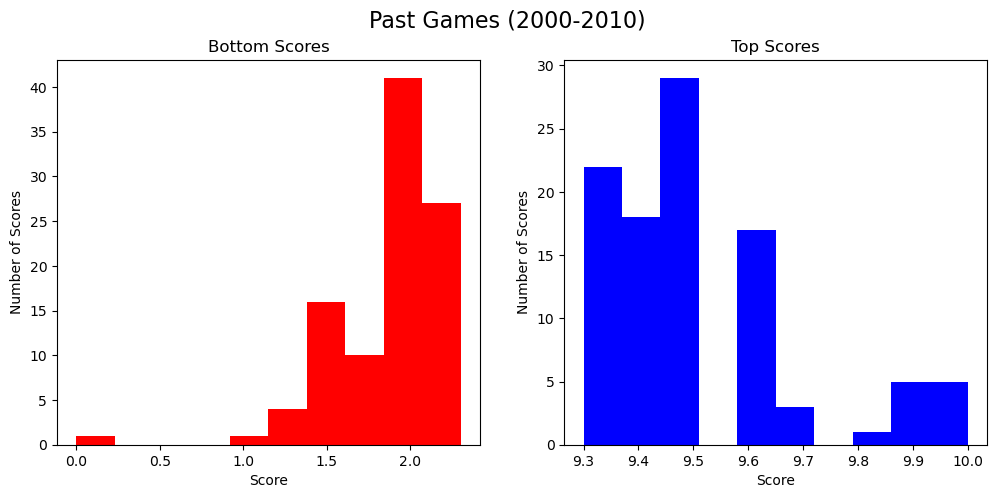

In [117]:
fig1, ax1 = plt.subplots(1,2, figsize = (12,5))

ax1[0].hist(df1['score_i'], color = 'red')
ax1[1].hist(df2['score_i'], color = 'blue')

plt.suptitle('Past Games (2000-2010)', fontsize=16)

ax1[0].set_title('Bottom Scores')
ax1[1].set_title('Top Scores')

ax1[0].set_xlabel('Score')
ax1[0].set_ylabel('Number of Scores')


ax1[1].set_xlabel('Score')
ax1[1].set_ylabel('Number of Scores')

plt.show()

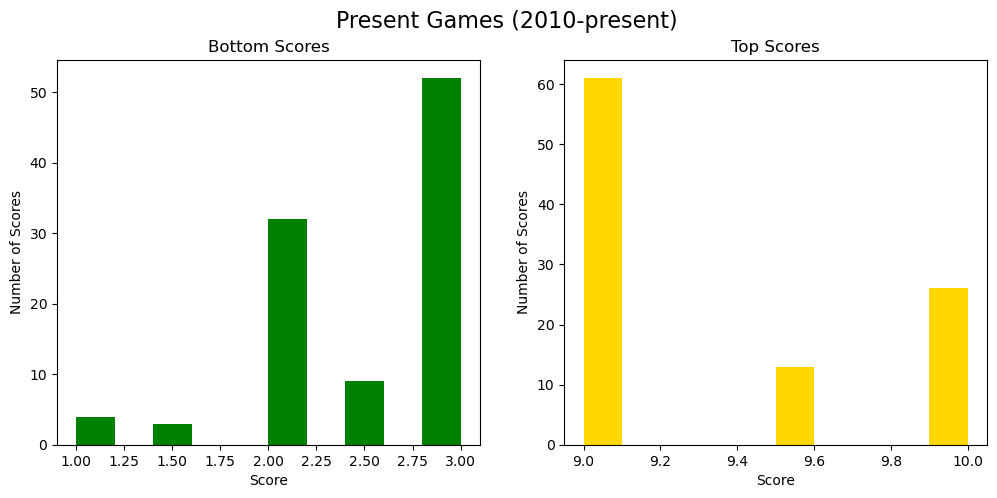

In [94]:
fig2, ax2 = plt.subplots(1,2, figsize = (12,5))

ax2[0].hist(df3['score_i'], color = 'green')
ax2[1].hist(df4['score_i'], color = 'gold')

plt.suptitle('Present Games (2010-present)', fontsize=16)


ax2[0].set_title('Bottom Scores')
ax2[1].set_title('Top Scores')

ax2[0].set_xlabel('Score')
ax2[0].set_ylabel('Number of Scores')

ax2[1].set_xlabel('Score')
ax2[1].set_ylabel('Number of Scores')

plt.show()

In [118]:
data_past_final['score_i'] = data_past_final['score'].astype('float64')
data_pres_final['score_i'] = data_pres_final['score'].astype('float64')
data_past_final['score_i']

0     0.0
1     1.0
2     1.2
3     1.2
4     1.3
     ... 
95    9.3
96    9.3
97    9.3
98    9.3
99    9.3
Name: score_i, Length: 200, dtype: float64

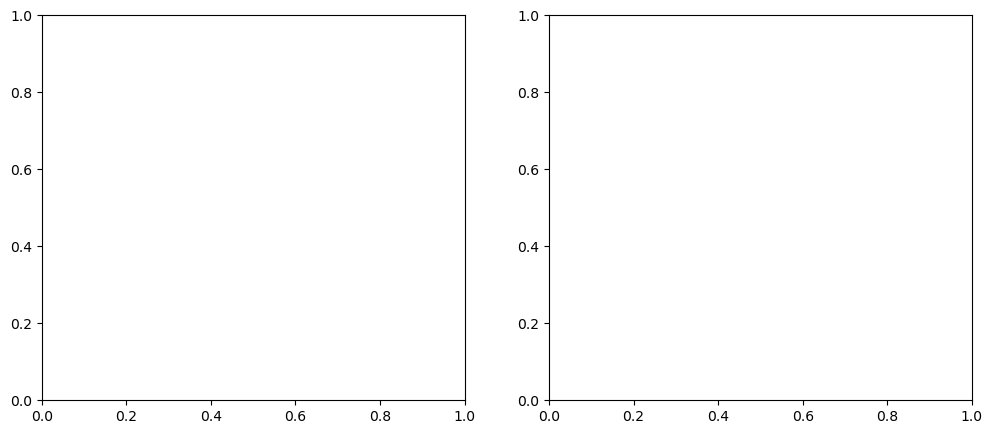

In [92]:
fig3, ax3 = plt.subplots(1,2, figsize = (12,5))

ax2[0].hist(data_past_final['score_i'], color = 'green')
ax2[1].hist(data_pres_final['score_i'], color = 'gold')


ax2[0].set_title('Bottom Scores')
ax2[1].set_title('Top Scores')

ax2[0].set_xlabel('Score')
ax2[0].set_ylabel('Number of Scores')

ax2[1].set_xlabel('Score')
ax2[1].set_ylabel('Number of Scores')

plt.show()

<Axes: ylabel='score_i'>

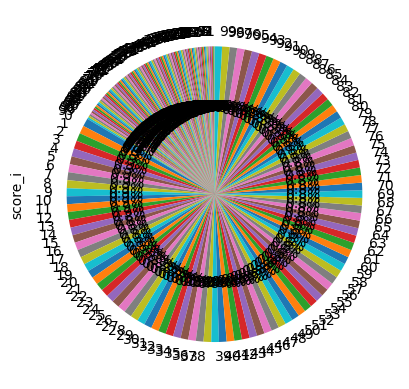

In [104]:
data_past_final['score_i'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
#data_pres_final['score_i'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=)

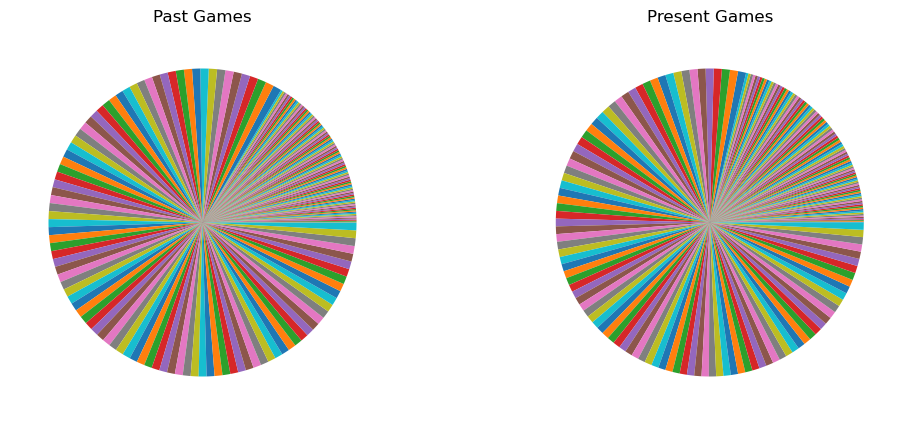

In [99]:
fig4, ax4 = plt.subplots(1,2, figsize = (12,5))


ax4[0].pie(data_past_final['score_i'])
ax4[1].pie(data_pres_final['score_i'])

ax4[0].set_title('Past Games')
ax4[1].set_title('Present Games')

plt.show()